In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv") # example submission

In [52]:
df_gender.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [53]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [54]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

<Axes: xlabel='Age', ylabel='Pclass'>

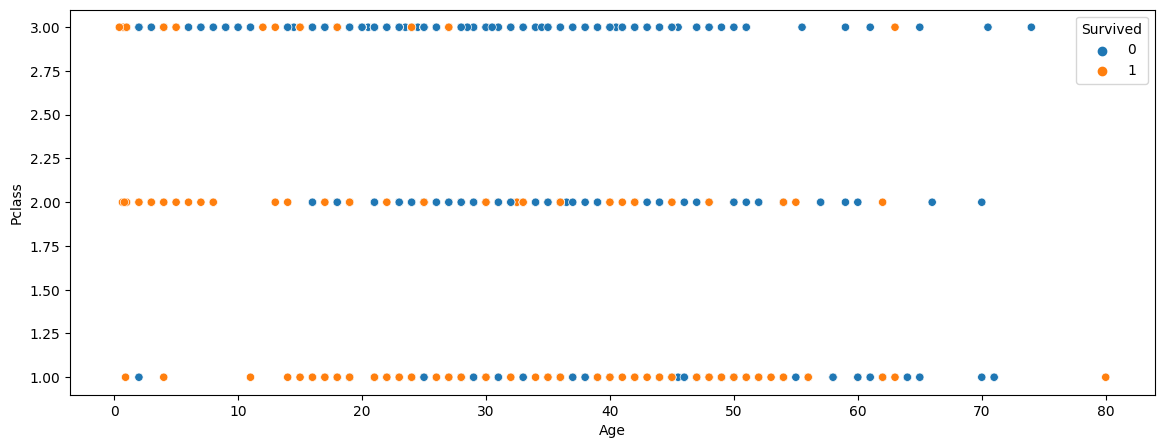

In [58]:
plt.figure(figsize=(14,5))
sns.scatterplot(x=df_train["Age"],y=df_train["Pclass"],hue=df_train["Survived"])

In [59]:
df_train["Cabin"].sort_values()

583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 891, dtype: object

In [60]:
df_train_cabin = df_train.sort_values("Cabin")
df_train_cabin.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


In [61]:
groupby_cabin = df_train.groupby(["Cabin"]).sum()
groupby_cabin.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,C
A14,476,0,1,"Clifford, Mr. George Quincy",male,0.0,0,0,110465,52.0000,S
A16,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C
A19,285,0,1,"Smith, Mr. Richard William",male,0.0,0,0,113056,26.0000,S
A20,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,C


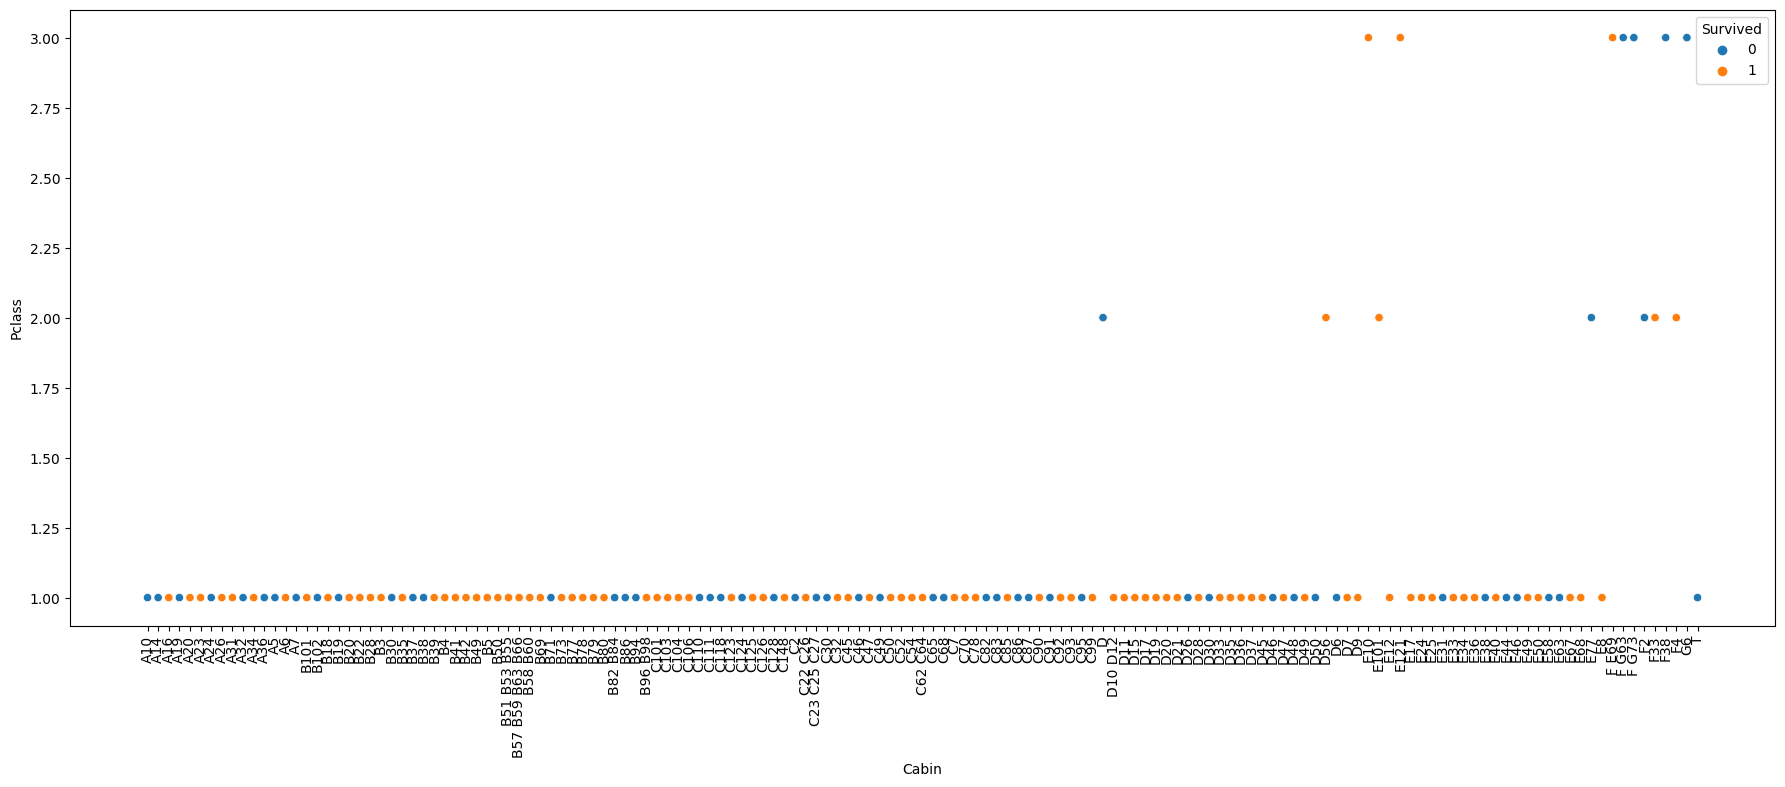

In [62]:
plt.figure(figsize=(22,8))
sns.scatterplot(x=df_train_cabin["Cabin"],y=df_train_cabin["Pclass"],hue=df_train_cabin["Survived"])
plt.xticks(rotation=90)
plt.show()

In [63]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
df_train["Cabin"].nunique()

147

In [65]:
df_test["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [66]:
df_test["Cabin"].nunique()

76

In [67]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [68]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
df_train.set_index("PassengerId",inplace=True)

In [70]:
df = df_train.drop(["Name","Ticket","Cabin","Embarked"],axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [71]:
df = pd.get_dummies(df,columns=["Sex"],dtype=int)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1
2,1,1,38.0,1,0,71.2833,1,0
3,1,3,26.0,0,0,7.9250,1,0
4,1,1,35.0,1,0,53.1000,1,0
5,0,3,35.0,0,0,8.0500,0,1


In [72]:
mean_age = df["Age"].mean()
df["Age"].fillna(mean_age,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


/tmp/ipykernel_32/1258398016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(mean_age,inplace=True)


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=5)

In [76]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
125,1,54.000000,0,1,77.2875,0,1
142,3,22.000000,0,0,7.7500,1,0
22,2,34.000000,0,0,13.0000,0,1
651,3,29.699118,0,0,7.8958,0,1
332,1,45.500000,0,0,28.5000,0,1
...,...,...,...,...,...,...,...
401,3,39.000000,0,0,7.9250,0,1
119,1,24.000000,0,1,247.5208,0,1
702,1,35.000000,0,0,26.2875,0,1


# model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

model_LogisticRegression = LogisticRegression(max_iter=500).fit(x_train,y_train)
print("Logistic Regression",model_LogisticRegression.score(x_test,y_test))

model_DecisionTree = DecisionTreeClassifier().fit(x_train, y_train)
print("Decision Tree: ",model_DecisionTree.score(x_test,y_test))

model_RandomForest = RandomForestClassifier().fit(x_train, y_train)
print("Random Forest: ",model_RandomForest.score(x_test,y_test))

model_SVC = SVC().fit(x_train, y_train)
print("SVC: ",model_SVC.score(x_test,y_test))

model_KNN = KNeighborsClassifier().fit(x_train, y_train)
print("KNN: ",model_KNN.score(x_test,y_test))

model_GaussianNB = GaussianNB().fit(x_train, y_train)
print("Gaussian Naive Bayes: ",model_GaussianNB.score(x_test,y_test))

model_GradientBoosting = GradientBoostingClassifier().fit(x_train, y_train)
print("Gradient Boosting: ",model_GradientBoosting.score(x_test,y_test))

model_AdaBoost = AdaBoostClassifier().fit(x_train, y_train)
print("AdaBoost: ",model_AdaBoost.score(x_test,y_test))

model_XGBoost = XGBClassifier().fit(x_train, y_train)
print("XGBoost: ",model_XGBoost.score(x_test,y_test))

Logistic Regression 0.8097014925373134
Decision Tree:  0.8171641791044776
Random Forest:  0.8395522388059702
SVC:  0.6753731343283582
KNN:  0.7164179104477612
Gaussian Naive Bayes:  0.8134328358208955
Gradient Boosting:  0.832089552238806
AdaBoost:  0.835820895522388
XGBoost:  0.8059701492537313


# The most successful result came from the Random Forest model, so we will continue with Random Forest.

In [78]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,1
2,1,1,38.000000,1,0,71.2833,1,0
3,1,3,26.000000,0,0,7.9250,1,0
4,1,1,35.000000,1,0,53.1000,1,0
5,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1
888,1,1,19.000000,0,0,30.0000,1,0
889,0,3,29.699118,1,2,23.4500,1,0


In [79]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
submit= df_test["PassengerId"]

In [81]:
submit

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
df_test.set_index("PassengerId",inplace=True)
df_test.drop(["Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)
df_test = pd.get_dummies(df_test,columns=["Sex"],dtype=int)
mean_test_age = df_test["Age"].mean()
df_test["Age"].fillna(mean_test_age,inplace=True)
mean_test_fare = df_test["Fare"].mean()
df_test["Fare"].fillna(mean_test_fare,inplace=True)
df_test

/tmp/ipykernel_32/3959234576.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(mean_test_age,inplace=True)
/tmp/ipykernel_32/3959234576.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
892,3,34.50000,0,0,7.8292,0,1
893,3,47.00000,1,0,7.0000,1,0
894,2,62.00000,0,0,9.6875,0,1
895,3,27.00000,0,0,8.6625,0,1
896,3,22.00000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,8.0500,0,1
1306,1,39.00000,0,0,108.9000,1,0
1307,3,38.50000,0,0,7.2500,0,1


# train

In [84]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,1
2,1,1,38.000000,1,0,71.2833,1,0
3,1,3,26.000000,0,0,7.9250,1,0
4,1,1,35.000000,1,0,53.1000,1,0
5,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1
888,1,1,19.000000,0,0,30.0000,1,0
889,0,3,29.699118,1,2,23.4500,1,0


In [85]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
1,3,22.000000,1,0,7.2500,0,1
2,1,38.000000,1,0,71.2833,1,0
3,3,26.000000,0,0,7.9250,1,0
4,1,35.000000,1,0,53.1000,1,0
5,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,1
888,1,19.000000,0,0,30.0000,1,0
889,3,29.699118,1,2,23.4500,1,0


In [86]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier().fit(x,y)

In [88]:
y_pred = model_RandomForest.predict(df_test)

In [89]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
output = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [91]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
